In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime

In [3]:
sns.set_theme(style="darkgrid", context="talk")
plt.style.use("dark_background")
plt.rcParams.update({"grid.linewidth":0.45, "grid.alpha":0.5}) 

In [4]:
def set_df(df):
    df.index = pd.to_datetime(df.timestamp)
    df.drop(labels='timestamp',axis=1,inplace=True)

    for col in df:
        df[col] = df[col]-np.mean(df[col])
    return df

In [5]:


df_sensor_one = pd.read_csv(r"E:\Projects\Vibration Sensing Touch Panel\data\region1_ten_taps\SENSOR0_data.csv")
df_sensor_two = pd.read_csv(r"E:\Projects\Vibration Sensing Touch Panel\data\region1_ten_taps\SENSOR1_data.csv")


df_sensor_one = set_df(df_sensor_one)
df_sensor_two = set_df(df_sensor_two)

std_dev_one = np.std(df_sensor_one['z'])
std_dev_two = np.std(df_sensor_two['z'])

df_sensor_two['taps'] = (~((df_sensor_two['z'] <= 2*std_dev_two)&(df_sensor_two['z'] >= -2*std_dev_two))).apply(int)
df_sensor_one['taps'] = (~((df_sensor_one['z'] <= 2*std_dev_one)&(df_sensor_one['z'] >= -2*std_dev_one))).apply(int)

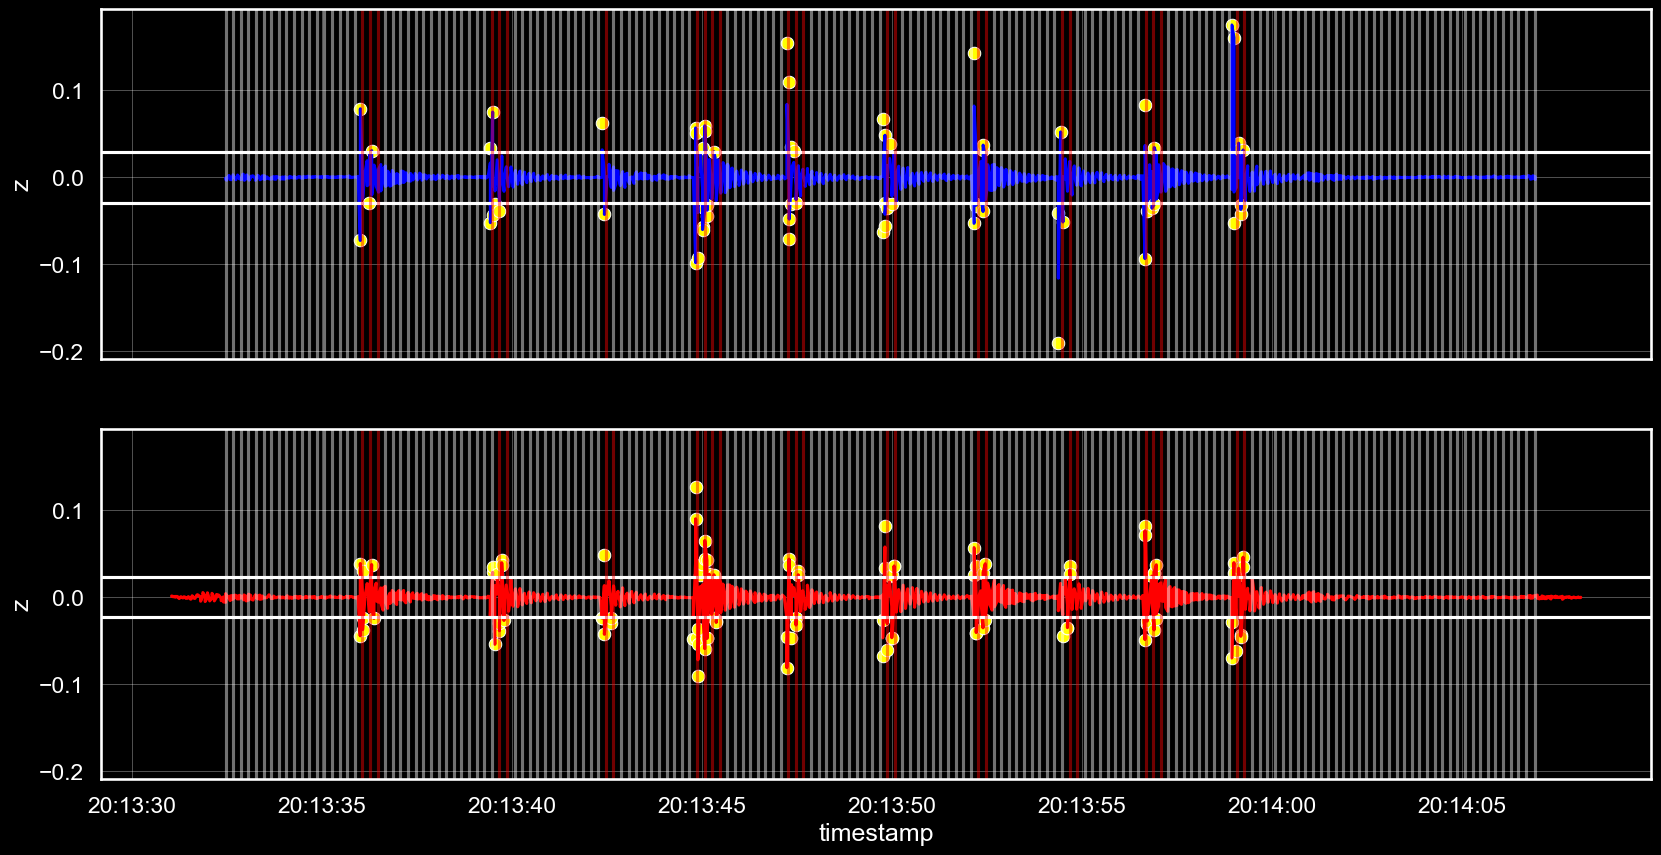

In [13]:
fig,ax = plt.subplots(2,figsize = (20,10),sharex='all',sharey='all')

sns.lineplot(x = df_sensor_one.index,y = df_sensor_one['z'],errorbar=None,color="blue",ax=ax[0]) #ci none cuts down on rendering time when using seaborn!!
sns.lineplot(x = df_sensor_two.index,y = df_sensor_two['z'],errorbar=None,color="red",ax=ax[1])

ax[0].axhline(y = 2*std_dev_one)
ax[0].axhline(y = -2*std_dev_one)

ax[1].axhline(y = 2*std_dev_two)
ax[1].axhline(y = -2*std_dev_two)

df_new_two = pd.DataFrame(df_sensor_two['z'][~((df_sensor_two['z'] <= 2*std_dev_two)&(df_sensor_two['z'] >= -2*std_dev_two))])
df_new_one = pd.DataFrame(df_sensor_one['z'][~((df_sensor_one['z'] <= 2*std_dev_one)&(df_sensor_one['z'] >= -2*std_dev_one))])


sns.scatterplot(x = df_new_two.index,y = df_new_two['z'],color="yellow",ax=ax[1])
sns.scatterplot(x = df_new_one.index,y = df_new_one['z'],color="yellow",ax=ax[0])

tap_dur = 0.2

time_diff = df_sensor_one.index[-1]-df_sensor_one.index[0]
time_diff //= (datetime.timedelta(seconds=tap_dur))

ax[0].axvline(x=df_sensor_one.index[0],alpha=0.450)
ax[1].axvline(x=df_sensor_one.index[0],alpha=0.450)

last_time = df_sensor_one.index[0]

for x in range(1,time_diff):

    new_time = df_sensor_one.index[0] + datetime.timedelta(seconds=x*tap_dur)

    if(1 in df_sensor_one[last_time:new_time]['taps'].values):
        color = 'red'
    else:
        color = 'white'


    ax[0].axvline(x=new_time,alpha=0.450,color=color)
    last_time = new_time

last_time = df_sensor_one.index[0]

for x in range(1,time_diff):

    new_time = df_sensor_one.index[0] + datetime.timedelta(seconds=x*tap_dur)

    if(1 in df_sensor_two[last_time:new_time]['taps'].values):
        color = 'red'
    else:
        color = 'white'


    ax[1].axvline(x=new_time,alpha=0.450,color=color)
    last_time = new_time

ax[0].axvline(x=df_sensor_one.index[-1],alpha=0.450)
ax[1].axvline(x=df_sensor_one.index[-1],alpha=0.450)

<Axes: xlabel='z', ylabel='Count'>

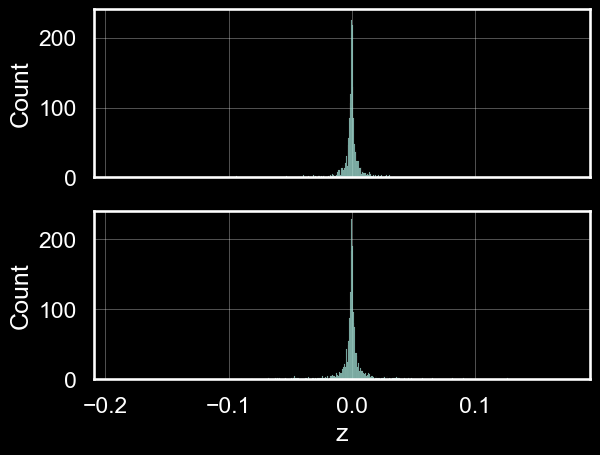

In [7]:
fig,ax = plt.subplots(2,sharex='all',sharey='all')
sns.histplot(df_sensor_one['z'],ax=ax[0])
sns.histplot(df_sensor_two['z'],ax=ax[1])

![Tap Detection Logic](/media/tap_detect.png)

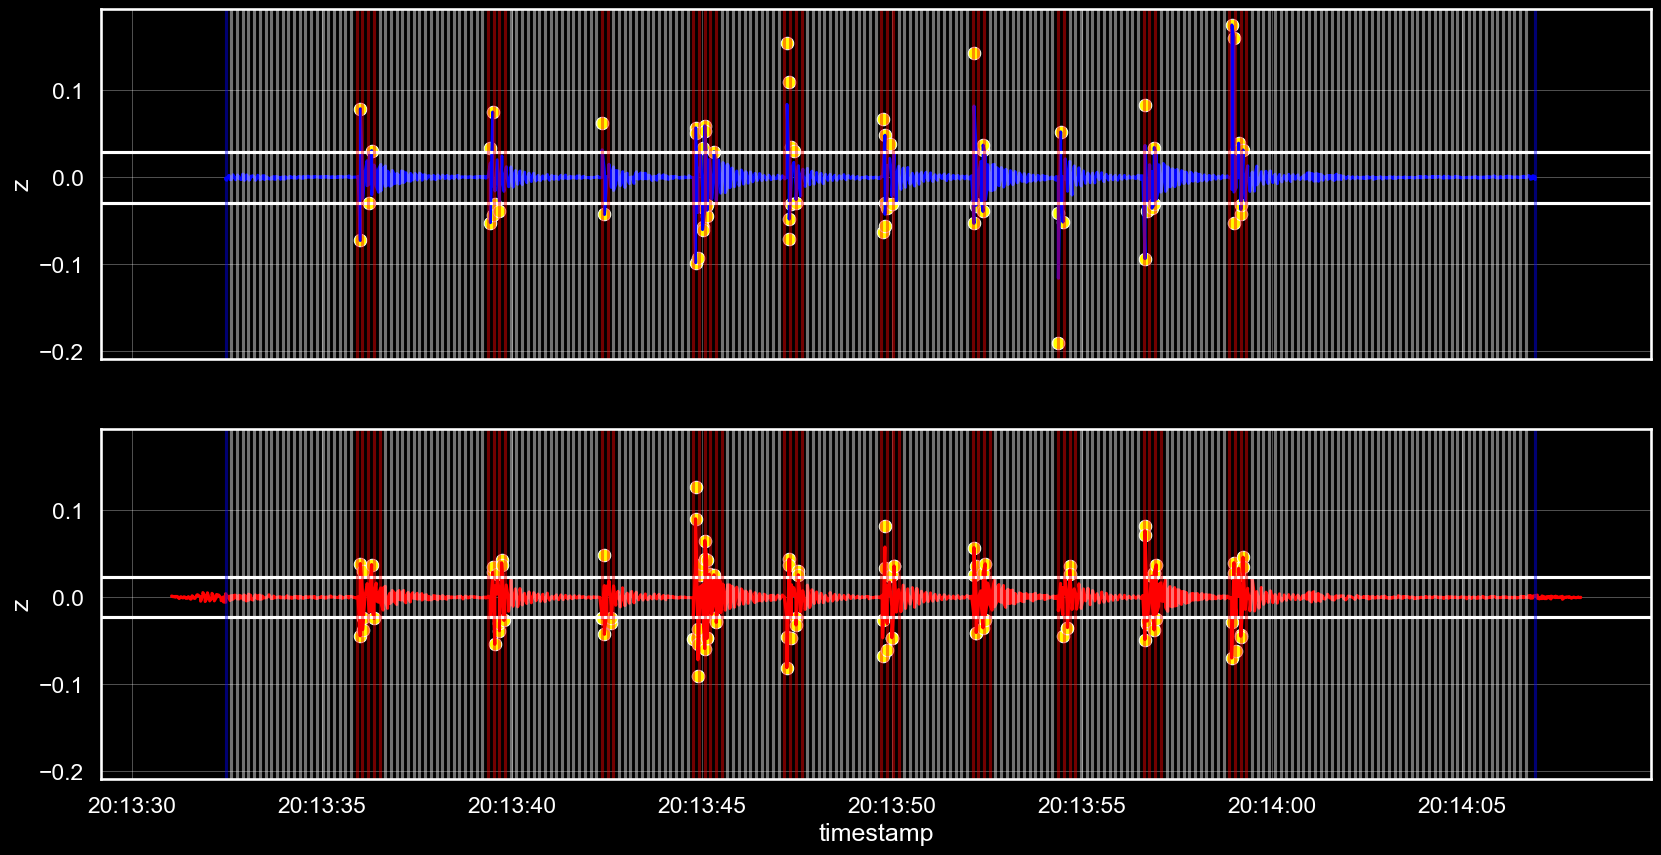

In [ ]:
window_size = 0.2
stride = 0.2*0.5



fig,ax = plt.subplots(2,figsize = (20,10),sharex='all',sharey='all')

sns.lineplot(x = df_sensor_one.index,y = df_sensor_one['z'],errorbar=None,color="blue",ax=ax[0]) #ci none cuts down on rendering time when using seaborn!!
sns.lineplot(x = df_sensor_two.index,y = df_sensor_two['z'],errorbar=None,color="red",ax=ax[1])

ax[0].axhline(y = 2*std_dev_one)
ax[0].axhline(y = -2*std_dev_one)

ax[1].axhline(y = 2*std_dev_two)
ax[1].axhline(y = -2*std_dev_two)

df_new_two = pd.DataFrame(df_sensor_two['z'][~((df_sensor_two['z'] <= 2*std_dev_two)&(df_sensor_two['z'] >= -2*std_dev_two))])
df_new_one = pd.DataFrame(df_sensor_one['z'][~((df_sensor_one['z'] <= 2*std_dev_one)&(df_sensor_one['z'] >= -2*std_dev_one))])


sns.scatterplot(x = df_new_two.index,y = df_new_two['z'],color="yellow",ax=ax[1])
sns.scatterplot(x = df_new_one.index,y = df_new_one['z'],color="yellow",ax=ax[0])


ax[0].axvline(x=df_sensor_one.index[0],alpha=0.450,color='blue')
ax[1].axvline(x=df_sensor_one.index[0],alpha=0.450,color='blue')


old_time = df_sensor_one.index[0]
new_time = df_sensor_one.index[0]+datetime.timedelta(seconds=window_size)


while new_time < df_sensor_one.index[-1]:

    window = df_sensor_one[old_time:new_time]['taps']
    if(1 in window.values):
        color = 'red'
    else:
        color = 'white'
    
    ax[0].axvline(x=old_time+datetime.timedelta(seconds=0.15),alpha=0.450,color=color)

    if(window.empty):
        break

    new_time += datetime.timedelta(seconds=0.15)
    old_time += datetime.timedelta(seconds=0.15)

old_time = df_sensor_one.index[0]
new_time = df_sensor_one.index[0]+datetime.timedelta(seconds=0.3)

while new_time < df_sensor_one.index[-1]:

    window = df_sensor_two[old_time:new_time]['taps']

    if(1 in window.values):
        color = 'red'
    else:
        color = 'white'
    
    ax[1].axvline(x=old_time+datetime.timedelta(seconds=0.15),alpha=0.450,color=color)

    if(window.empty):
        break
    
    new_time += datetime.timedelta(seconds=0.15)
    old_time += datetime.timedelta(seconds=0.15)


ax[0].axvline(x=df_sensor_one.index[-1],alpha=0.450,color='blue')
ax[1].axvline(x=df_sensor_one.index[-1],alpha=0.450,color='blue')
    


In [10]:
print(df_new_two.index.to_series().diff())

timestamp
2025-06-02 20:13:36.010                      NaT
2025-06-02 20:13:36.012   0 days 00:00:00.002000
2025-06-02 20:13:36.071   0 days 00:00:00.059000
2025-06-02 20:13:36.071          0 days 00:00:00
2025-06-02 20:13:36.072   0 days 00:00:00.001000
                                   ...          
2025-06-02 20:13:59.114   0 days 00:00:00.001000
2025-06-02 20:13:59.172   0 days 00:00:00.058000
2025-06-02 20:13:59.172          0 days 00:00:00
2025-06-02 20:13:59.232   0 days 00:00:00.060000
2025-06-02 20:13:59.233   0 days 00:00:00.001000
Name: timestamp, Length: 99, dtype: timedelta64[ns]


In [11]:
tap_dur = 100 #in millis
suffix_sum = np.full(len(df_new_two.index),fill_value=-1,dtype="timedelta64[ms]")
temp_date_time_var = None
for x in range(len(df_new_two.index)):
    if x == 0:
        suffix_sum[0] = 0
    else:
        suffix_sum[x] = df_new_two.index[x]-df_new_two.index[x-1]
print(suffix_sum)
print(type(suffix_sum[0]))

for x in range(len(suffix_sum)):
    print(f"{suffix_sum[x]}  {df_new_two.index[x]}")



[   0    2   59    0    1  238   61 3120    1   58   61   61    1   59
    0   59 2580    1   59    1  179    1 2160   59    0    1   59    1
    0   59   60   60    1    1   57    1    1   59    1  119    1   60
    1 1858    1   59    1   59  120    1   59    1 2220    0   59    0
   60   61   59    0    1   60    0 2100    1   58    0    1  179    2
   58    1 2039  120    1   60    0 1979    1    0   59    1  119   60
    1    1   58    1 1980    1   58    1   59   62    1   58    0   60
    1]
<class 'numpy.timedelta64'>
0 milliseconds  2025-06-02 20:13:36.010000
2 milliseconds  2025-06-02 20:13:36.012000
59 milliseconds  2025-06-02 20:13:36.071000
0 milliseconds  2025-06-02 20:13:36.071000
1 milliseconds  2025-06-02 20:13:36.072000
238 milliseconds  2025-06-02 20:13:36.310000
61 milliseconds  2025-06-02 20:13:36.371000
3120 milliseconds  2025-06-02 20:13:39.491000
1 milliseconds  2025-06-02 20:13:39.492000
58 milliseconds  2025-06-02 20:13:39.550000
61 milliseconds  2025-06-02 20